In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')
 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [6]:
header = ["total_ex", "edu_ex", "population", "over_65y"]

In [7]:
df1 = pd.read_csv("FR-ShichosonSub.csv",names=("population","over_65y", "total_ex","edu_ex"))

In [8]:
df2 = pd.read_csv("FR1-ShichosonList.csv",header=None)

In [9]:
df = pd.concat([df1, df2],axis=1)

In [10]:
df_new = df.rename(columns={"population":"y"})

In [11]:
train = df.rename(columns={0:"name"})

In [12]:
y = train["population"] 

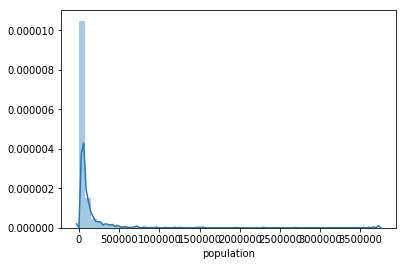

In [9]:
sns.distplot(y)
plt.show()

In [14]:
df2 = train.drop("name",axis=1)

In [15]:
df3 = df2.rename(columns={"population":"y"})

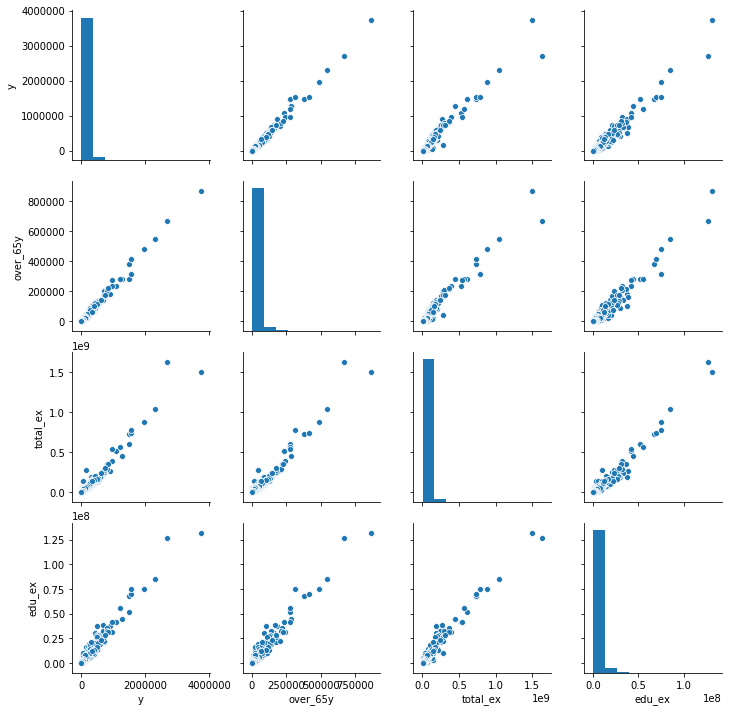

In [13]:
sns.pairplot(df_new)
plt.show()

In [16]:
X = df3.drop("y",axis=1)

検証用にデータを分割

In [17]:
# ホールド・アウト法によるデータの分割
# train:test = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(lr.coef_)

0.990557688270905
0.9897867790027722
[3.34787409e+00 5.14298289e-05 4.22060663e-03]


各変数が予測にどれほど影響している見るためt値をRで確認

In [19]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [20]:
%R -i df_new
%R -i X
%R -i y

In [23]:
%R res = lsfit(X,y)$residuals
%R ls.print(lsfit(X,y))
%R 
%R 


Residual Standard Error=18442.92
R-Square=0.9904
F-statistic (df=3, 1737)=59692.04
p-value=0

            Estimate  Std.Err  t-value Pr(>|t|)
Intercept -7340.2367 494.0368 -14.8577    0.000
over_65y      3.3479   0.0508  65.8963    0.000
total_ex      0.0001   0.0000   1.8537    0.064
edu_ex        0.0042   0.0003  14.6379    0.000




total_exはt値が２以下なのでのぞいて再度分析
６５歳以上人口、教育支出費と一緒に使うと総支出費は人口を説明する説明力が低いことが分かった。

In [24]:
X2 = X.drop("total_ex",axis=1)

In [26]:
# ホールド・アウト法によるデータの分割
# train:test = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X2,y)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(lr.coef_)

0.9905490001020197
0.9897296949173744
[3.39788398 0.00448043]


実際に総支出費をのぞいても予測制度はほとんどかわらなかった。